# Loan Default Prediction

### Problem Statement:- 
Financial institutions, spanning from major banks to governmental entities, extensively utilize loan services. Among the foremost goals for entities offering financial loan services is the reduction of payment defaults and the assurance that borrowers adhere to the expected repayment terms. To achieve this, many organizations aim to pinpoint individuals with the greatest likelihood of defaulting on their loans.     
Limited visibility into potential risks associated with loans hampers the efficiency of decision-making processes for financial institutions. As we can't solely depend on the indicators like credit score to identify defaulters, we also need to consider other parameters/indicators

###  Aim:- 
This project aimed to develop a toolset for predicting loan default using both machine learning algorithms and data visualization tools, specifically Power BI. The combination of these will provide a better/proactive solution for financial institutions, enhancing decision-making processes and risk management.

### Objective:-
Develop a system combining machine learning models and interactive dashboards to predict and visualize the likelihood of loan default, as well as to identity trends and pattern.


### Dataset:-
This file contains various features such as age, income, credit score, etc. for an individual and tells whether he/she has defaulted on the loan payment.

LoanID:- A unique identifier for each loan

Age:- The age of the borrower

Income:- The annual income of the borrower

LoanAmount:- The amount of money being borrowed

CreditScore:- The credit score of the borrower

MonthsEmployed:- The number of months the borrower has been employed

NumCreditLines:- The number of credit lines the borrower has open

InterestRate:- The interest rate for the loan

LoanTerm:- The term length of the loan in months

DTIRatio:- The Debt-to-Income ratio

Education:- The highest level of education attained by the borrower

EmploymentType:- The type of employment status of the borrower

MaritalStatus:- The marital status of the borrower

HasMortgage:- Whether the borrower has a mortgage

HasDependents:- Whether the borrower has dependents

LoanPurpose:- The purpose of the loan

HasCoSigner:- Whether the loan has a co-signer

Default:- Indicate whether the loan defaulted or not (target_variable)

## Import libraries

In [20]:
import numpy as np                                     # linear alegbra
import pandas as pd                                    # data processing
import seaborn as sns                                  # ploting graphs
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder         # converting categorical to numerical
from sklearn.preprocessing import StandardScaler       # scaling
from sklearn.model_selection import train_test_split   # spiltting the data
from sklearn.linear_model import LogisticRegression    # model building algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV       # hyperparameter tuning
                                                       # evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings                                        # for ingore warnings
warnings.filterwarnings('ignore')

### Load and display the dataset

In [21]:
df = pd.read_csv("Loan_default.csv")
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994.0,50587.0,520,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432.0,124440.0,458,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208.0,129188.0,451,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713.0,44799.0,743,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437.0,9139.0,633,8.0,4.0,6.51,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979.0,210682.0,541,109.0,4.0,14.11,12.0,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953.0,189899.0,511,14.0,2.0,11.55,24.0,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820.0,208294.0,597,70.0,3.0,5.29,60.0,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109.0,60575.0,809,40.0,1.0,20.90,48.0,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


## EDA

In [22]:
print(df.shape)
df.info()

(255347, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255237 non-null  float64
 3   LoanAmount      254986 non-null  float64
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  254267 non-null  float64
 6   NumCreditLines  254271 non-null  float64
 7   InterestRate    255323 non-null  float64
 8   LoanTerm        255244 non-null  float64
 9   DTIRatio        255336 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  254530 non-null  object 
 12  MaritalStatus   254940 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   254594 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255275 non-null  object 
 1

In [23]:
df.describe(include='all')

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347,255347.000000,255237.000000,254986.000000,255347.000000,254267.000000,254271.000000,255323.000000,255244.000000,255336.000000,255347,254530,254940,255347,254594,255347,255275,255347.000000
unique,255347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,5,2,NaN
top,NBKWZOXEDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64366,63968,85160,127677,127363,51298,127666,NaN
mean,NaN,43.498306,82497.179586,127582.645330,574.263359,59.544471,2.501024,13.492571,36.026657,0.500213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148786
std,NaN,14.990258,38962.221761,70840.119822,158.904166,34.641846,1.117094,6.636437,16.969694,0.230917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355878
min,NaN,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,31.000000,48825.000000,66157.500000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,43.000000,82464.000000,127561.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,56.000000,116213.000000,188988.750000,712.000000,90.000000,4.000000,19.250000,48.000000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [24]:
# To check if there are any special characters in place of values
for i in df.columns:
    print({i:df[i].unique()})

{'LoanID': array(['I38PQUQS96', 'HPSK72WA7R', 'C1OZ6DPJ8Y', ..., 'XQK1UUUNGP',
       'JAO28CPL4H', 'ZTH91CGL0B'], dtype=object)}
{'Age': array([56, 69, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61,
       47, 55, 50, 29, 42, 66, 44, 59, 45, 33, 64, 68, 54, 24, 26, 35, 21,
       31, 67, 43, 37, 52, 34, 23, 51, 27, 48, 65, 62, 58, 18, 22, 30, 49,
       63], dtype=int64)}
{'Income': array([ 85994.,  50432.,  84208., ..., 104108.,  76558., 124446.])}
{'LoanAmount': array([ 50587., 124440., 129188., ..., 105905., 168231., 208294.])}
{'CreditScore': array([520, 458, 451, 743, 633, 720, 429, 531, 827, 480, 400, 375, 829,
       395, 635, 432, 313, 811, 319, 376, 419, 583, 528, 468, 839, 343,
       514, 462, 580, 604, 551, 840, 787, 607, 669, 506, 540, 695, 707,
       386, 747, 639, 795, 498, 560, 505, 393, 369, 439, 634, 657, 417,
       455, 351, 655, 737, 771, 775, 680, 694, 534, 529, 416, 318, 411,
       802, 305, 674, 585, 750, 303, 487, 730, 579, 658, 683, 574, 421,
 

In [25]:
missing_values = pd.DataFrame({'missing_count': df.isnull().sum(), 
                               'missing_percent': round((df.isnull().sum()/len(df)) * 100,3)})
missing_values

,missing_count,missing_percent
LoanID,0,0.000
Age,0,0.000
Income,110,0.043
LoanAmount,361,0.141
CreditScore,0,0.000
MonthsEmployed,1080,0.423
NumCreditLines,1076,0.421
InterestRate,24,0.009
LoanTerm,103,0.040
DTIRatio,11,0.004


In [26]:
df.duplicated().sum()

0

#### Handling Missing Values

In [27]:
for x in df.columns:
    if df[x].dtype=='object' or df[x].dtype=='bool':
        df[x].fillna(df[x].mode()[0],inplace=True)
    elif df[x].dtype=='int64' or df[x].dtype=='float64':
        df[x].fillna(df[x].median(),inplace=True)

In [28]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

#### Inference : 
1. The dataset consists of 18 fields and 255,346 records, including integer and object data types. The 'objects' need to be converted into integers for further modeling.
2. The dataset is free of duplicate values and special characters. 
3. However, it does contain null values, since the missing (null) values constitute less than 1%, we can drop them using dropna(). But it's important to note that some of these missing values may contribute to a default value of 1, indicating that these records show loan defaults. Therefore, we'll use fillna() to impute these missing values by employing the mode and median aggregation.

### Data visualization

In [29]:
default_count = pd.DataFrame({'Count':df.Default.value_counts()})
default_count['PercentOfEachCOunt'] = round((default_count['Count']/df.shape[0])*100,2)
default_count

,Count,PercentOfEachCOunt
0,217355,85.12
1,37992,14.88


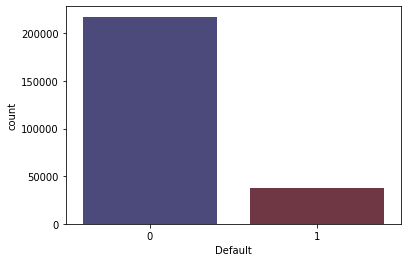

In [30]:
#DV 1: Default distribution by countplot

sns.countplot(data=df,x=df.Default,palette='icefire')
plt.show()

We can clearly observe that the count of defaulters is low, amounting to 14.88%.

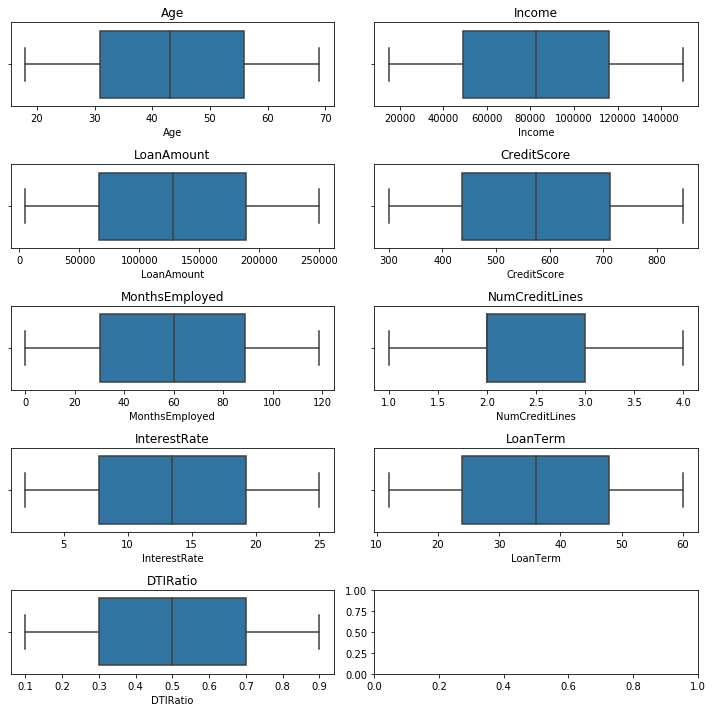

In [31]:
# check for outliers using boxplot

cols = df.columns
fig, axs = plt.subplots(5, 2, figsize=(10, 10))
sns.boxplot(df.iloc[:,1],ax=axs[0, 0],orient='h').set_title(cols[1])
sns.boxplot(df.iloc[:,2],ax=axs[0, 1],orient='h').set_title(cols[2])
sns.boxplot(df.iloc[:,3],ax=axs[1, 0],orient='h').set_title(cols[3])
sns.boxplot(df.iloc[:,4],ax=axs[1, 1],orient='h').set_title(cols[4])
sns.boxplot(df.iloc[:,5],ax=axs[2, 0],orient='h').set_title(cols[5])
sns.boxplot(df.iloc[:,6],ax=axs[2, 1],orient='h').set_title(cols[6])
sns.boxplot(df.iloc[:,7],ax=axs[3, 0],orient='h').set_title(cols[7])
sns.boxplot(df.iloc[:,8],ax=axs[3, 1],orient='h').set_title(cols[8])
sns.boxplot(df.iloc[:,9],ax=axs[4, 0],orient='h').set_title(cols[9])
fig.tight_layout()

No outliers were found in the dataset.

In [32]:
#segregate variables

df_obj = []                                         # counter
df_num = []

for i in df:
    if df[i].dtype=="object":
        df_obj.append(i)
    else:
        df_num.append(i)
        
print(df_obj)
print(df_num)

['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']


In [33]:
#unique values and its count
for col in df_obj:
  print(f" {col} :- {df[col].unique()} => {df[col].nunique()} values")

 LoanID :- ['I38PQUQS96' 'HPSK72WA7R' 'C1OZ6DPJ8Y' ... 'XQK1UUUNGP' 'JAO28CPL4H'
 'ZTH91CGL0B'] => 255347 values
 Education :- ["Bachelor's" "Master's" 'High School' 'PhD'] => 4 values
 EmploymentType :- ['Full-time' 'Unemployed' 'Self-employed' 'Part-time'] => 4 values
 MaritalStatus :- ['Divorced' 'Married' 'Single'] => 3 values
 HasMortgage :- ['Yes' 'No'] => 2 values
 HasDependents :- ['Yes' 'No'] => 2 values
 LoanPurpose :- ['Other' 'Auto' 'Business' 'Home' 'Education'] => 5 values
 HasCoSigner :- ['Yes' 'No'] => 2 values


In [43]:
# check for skewness and kurtosis of each numerical variable.

for col in df_num:
    print(f"# {col}:")
    print("Skewness: %f" % df[col].skew())
    print("Kurtosis: %f" % df[col].kurt())
    print("--------------------")

# Age:
Skewness: 0.000698
Kurtosis: -1.198431
--------------------
# Income:
Skewness: -0.000304
Kurtosis: -1.197488
--------------------
# LoanAmount:
Skewness: -0.001938
Kurtosis: -1.201172
--------------------
# CreditScore:
Skewness: 0.004701
Kurtosis: -1.200310
--------------------
# MonthsEmployed:
Skewness: -0.002375
Kurtosis: -1.191781
--------------------
# NumCreditLines:
Skewness: 0.005032
Kurtosis: -1.353502
--------------------
# InterestRate:
Skewness: 0.004643
Kurtosis: -1.197007
--------------------
# LoanTerm:
Skewness: -0.002230
Kurtosis: -1.299238
--------------------
# DTIRatio:
Skewness: -0.001501
Kurtosis: -1.199598
--------------------
# Default:
Skewness: 1.973806
Kurtosis: 1.895926
--------------------


In [57]:
# creating a defined function of distribtion plot

def dist_default(var_name, df):
    plt.figure(figsize=(12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.distplot(df.loc[df['Default'] == 0, var_name], label='Default == 0')
    sns.distplot(df.loc[df['Default'] == 1, var_name], label='Default == 1')
    
    # Label the plot
    plt.xlabel(var_name)
    #plt.ylabel('Density')
    plt.title('%s Distribution' % var_name)
    plt.legend()

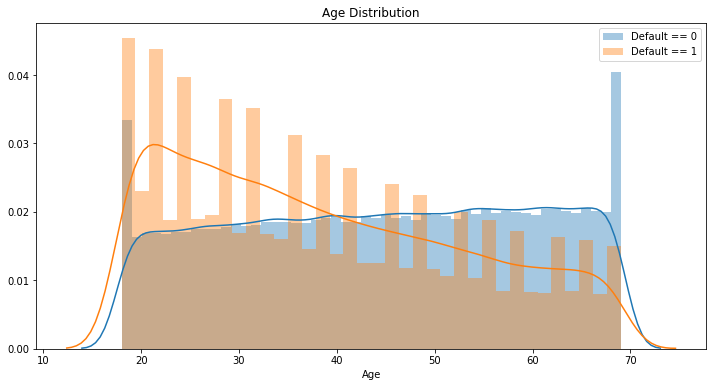

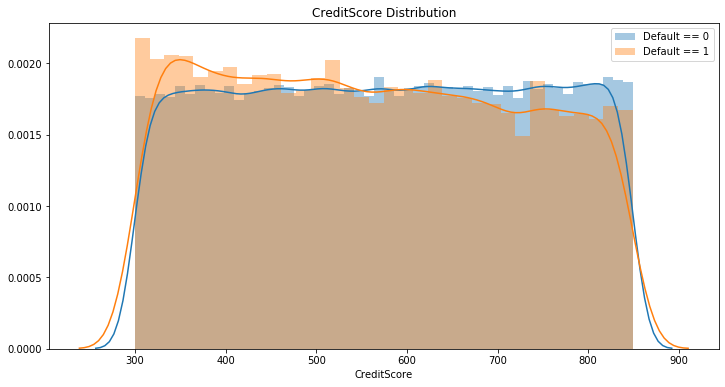

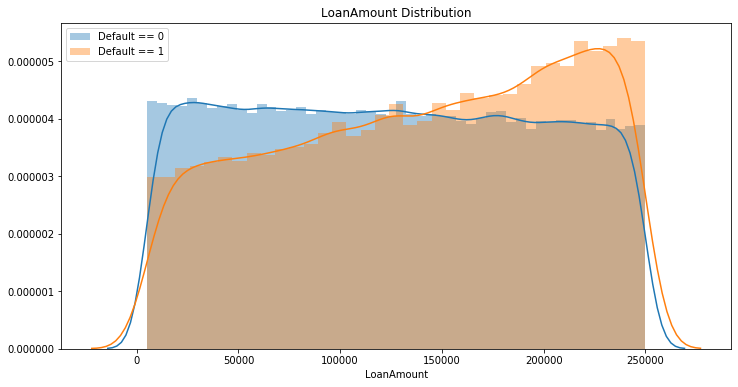

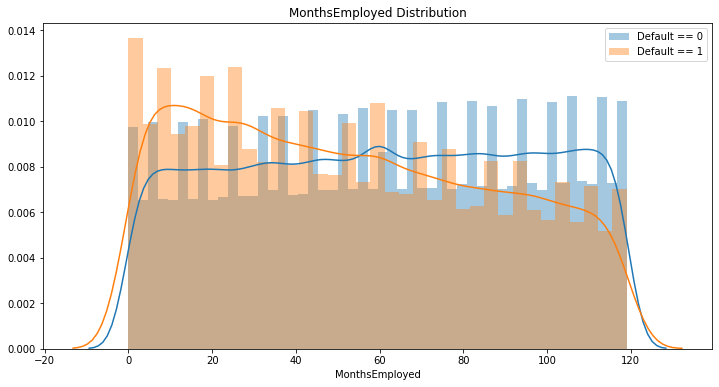

In [58]:
#DV 2: Age, credit_score, loan_amount, Number of months employed Distribution using distplot.

dist_default('Age', df)
plt.show()

dist_default('CreditScore', df)
plt.show()

dist_default('LoanAmount', df)
plt.show()

dist_default('MonthsEmployed', df)
plt.show()

1. From the above graphs, we can infer that the age group 20-24 has a high count, making individuals in this age range more likely to default compared to those in other income bands.
2. Additionally, we observe that individuals with a credit score below 400 are more likely to default.
3. Moreover, borrowers with a loan amount higher than $150,000 face difficulties in paying off the loan.
4. Furthermore, individuals with 0 to 18 months of employment tend to default more frequently

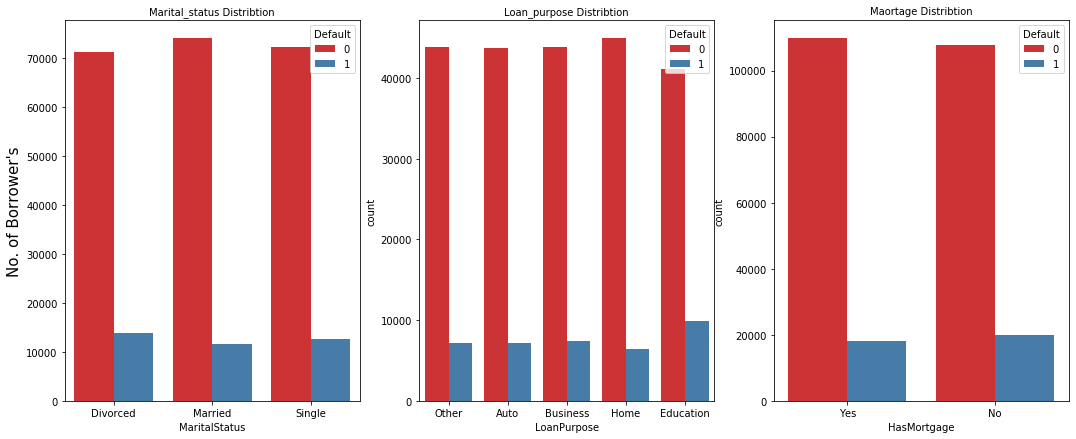

In [91]:
plt.figure(figsize=(18,7))
plt.subplot(131)
sns.countplot(data=df,x=df.MaritalStatus,hue=df.Default,palette='Set1')
plt.title('Marital_status Distribtion',size = 10)
plt.ylabel("No. of Borrower's",size=15)

plt.subplot(132)
sns.countplot(data=df,x=df.LoanPurpose,hue=df.Default,palette='Set1')
plt.title('Loan_purpose Distribtion',size = 10)

plt.subplot(133)
sns.countplot(data=df,x=df.HasMortgage,hue=df.Default,palette='Set1')
plt.title('Mortgage Distribtion',size = 10)

plt.show()

We can see that the chance of defaulting for married individuals is relatively low compared to those who are divorced or single. Additionally, the default rate for loans taken for educational purposes is higher compared to other purposes. Furthermore, borrowers with or without a mortgage have an almost equal chance of defaulting.

In [18]:
# Pivot_table
np.round(df.pivot_table(index='Default',values=['InterestRate','LoanAmount','NumCreditLines',
                                                   'Age','Income','MonthsEmployed'],
                        aggfunc=('mean','std')),2)

Age           Income           InterestRate       LoanAmount  \
          mean    std      mean       std         mean   std       mean   
Default                                                                   
0        44.40  14.89  84243.82  38311.54        13.18  6.61  125412.21   
1        38.36  14.52  72504.40  41037.19        15.29  6.48  139999.65   

                  MonthsEmployed        NumCreditLines        
              std           mean    std           mean   std  
Default                                                       
0        70664.72          60.73  34.48           2.49  1.11  
1        70225.59          52.77  34.27           2.57  1.12

##### Exporting the cleaned dataset to create a dashboard using Power BI

In [107]:
df.to_csv('Loan_default_new.csv',index=False,header=True)

#### Converting categorical(obj) varibles to numerical(int) varibles

In [19]:
#segregate categorical variables

df_obj = []                                         # counter

for i in df:
    if df[i].dtype=="object":
        df_obj.append(i)
        
df_obj

['LoanID',
 'Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [20]:
le=LabelEncoder()                                   # using label encoder

for x in df_obj:
    df[x]=le.fit_transform(df[x])                   # fit and transform values by label encoder

    
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,128027,56,85994.0,50587.0,520,80.0,4.0,15.23,36.0,0.44,0,0,0,1,1,4,1,0
1,125442,69,50432.0,124440.0,458,15.0,1.0,4.81,60.0,0.68,2,0,1,0,0,4,1,0
2,85333,46,84208.0,129188.0,451,26.0,3.0,21.17,24.0,0.31,2,3,0,1,1,0,0,1
3,220129,32,31713.0,44799.0,743,0.0,3.0,7.07,24.0,0.23,1,0,1,0,0,1,0,0
4,105746,60,20437.0,9139.0,633,8.0,4.0,6.51,48.0,0.73,0,3,0,0,1,0,0,0


In [21]:
#dropping laonID since we won't be needing that

df.drop('LoanID',axis=1,inplace=True)
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994.0,50587.0,520,80.0,4.0,15.23,36.0,0.44,0,0,0,1,1,4,1,0
1,69,50432.0,124440.0,458,15.0,1.0,4.81,60.0,0.68,2,0,1,0,0,4,1,0
2,46,84208.0,129188.0,451,26.0,3.0,21.17,24.0,0.31,2,3,0,1,1,0,0,1
3,32,31713.0,44799.0,743,0.0,3.0,7.07,24.0,0.23,1,0,1,0,0,1,0,0
4,60,20437.0,9139.0,633,8.0,4.0,6.51,48.0,0.73,0,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979.0,210682.0,541,109.0,4.0,14.11,12.0,0.85,0,0,1,0,0,4,0,0
255343,32,51953.0,189899.0,511,14.0,2.0,11.55,24.0,0.21,1,1,0,0,0,3,0,1
255344,56,84820.0,208294.0,597,70.0,3.0,5.29,60.0,0.50,1,2,1,1,1,0,1,0
255345,42,85109.0,60575.0,809,40.0,1.0,20.90,48.0,0.44,1,1,2,1,1,4,0,0


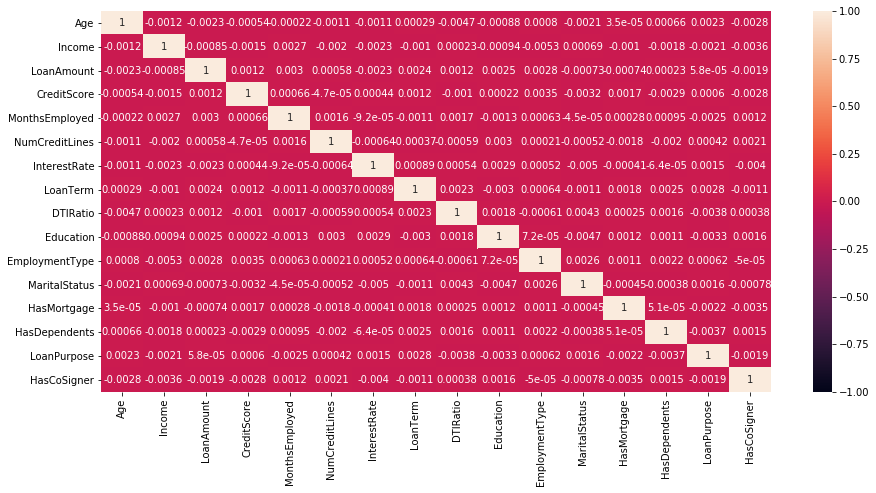

In [22]:
#Assumption of no multicolinearity: There should be no multicolinearity between the independent variables

df_ind = df.iloc[:,0:-1]                                # creating independent varibles   
corr_df = df_ind.corr(method='pearson')

plt.figure(figsize=(15,7))
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

There is no multicollinearity between independent variables found.

#### Spiltting the data into independent and target variable.

In [23]:
df.shape

(255347, 17)

In [24]:
x=df.iloc[:,0:-1]                                      #independent variables
y=df.iloc[:,-1]                                        #Target variable

In [25]:
print(x.shape)
print(y.shape)

(255347, 16)
(255347,)


##### Scaling

In [26]:
np.set_printoptions(suppress=True)

In [27]:
scaler = StandardScaler()                               
scaler.fit(x)                                           #training on data
x=scaler.transform(x)                                   #transforming the data

print(x)

[[ 0.83398951  0.08976888 -1.08766403 ...  0.99654011  1.41535378
   0.99949493]
 [ 1.70122109 -0.82315986 -0.04439355 ... -1.0034719   1.41535378
   0.99949493]
 [ 0.1668883   0.04391964  0.02267817 ...  0.99654011 -1.41606345
  -1.00050532]
 ...
 [ 0.83398951  0.05963058  1.14015416 ...  0.99654011 -1.41606345
   0.99949493]
 [-0.09995219  0.06704963 -0.94657043 ...  0.99654011  1.41535378
  -1.00050532]
 [ 1.23425024 -1.54232036 -1.54120339 ... -1.0034719  -0.00035483
   0.99949493]]


Here, we conclude the exploratory data analysis (EDA) and preprocessing steps, transitioning into the model-building phase

##### Building the model and spilting the data into train and test

In [28]:
#split the data into train and test

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=77)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("Percentage of train data",x_train.shape[0]/x.shape[0]*100)

(178742, 16)
(178742,)
(76605, 16)
(76605,)
Percentage of train data 69.99964753844769


Applying different algorithms to determine which one achieves the highest accuracy for modeling and, if possible, for tuning

In [30]:
# first, initialize the classificators

tree= DecisionTreeClassifier(random_state=77)                       #using the random state for reproducibility
knn= KNeighborsClassifier(metric='euclidean')
rf=RandomForestClassifier(random_state=77)
logreg=LogisticRegression(random_state=77)

In [31]:
#create a list with the objects 
models= [tree, knn, rf, logreg]

accuracies = {}                                                     # Create a dictionary to store accuracies

for model in models:
    model.fit(x_train, y_train)                                     # fit the model
    y_pred= model.predict(x_test)                                   # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) 
    clf_report= classification_report(y_test, y_pred)
    
    model_name = type(model).__name__   
    accuracies[model_name] = round(accuracy * 100,2)                         # Store accuracy in the dictionary
    
    print(type(model).__name__,":")
    print(confusion_matrix(y_test,y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n","-----------------------------------","\n")

DecisionTreeClassifier :
[[57189  8114]
 [ 6624  4678]]
The accuracy of the  DecisionTreeClassifier  model is  80.76104692905163
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     65303
           1       0.37      0.41      0.39     11302

    accuracy                           0.81     76605
   macro avg       0.63      0.64      0.64     76605
weighted avg       0.82      0.81      0.81     76605


 ----------------------------------- 

KNeighborsClassifier :
[[63245  2058]
 [10078  1224]]
The accuracy of the  KNeighborsClassifier  model is  84.15769205665427
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     65303
           1       0.37      0.11      0.17     11302

    accuracy                           0.84     76605
   macro avg       0.62      0.54      0.54     76605
weighted avg       0.79      0.84      0.80     76605


 --

In [32]:
accuracies

{'DecisionTreeClassifier': 80.76,
 'KNeighborsClassifier': 84.16,
 'RandomForestClassifier': 88.98,
 'LogisticRegression': 85.55}

##### Inferences :
1. Among the models used, RandomForest_Classifier has achieved the highest accuracy, with achieving 88.98%.
2. Additionally, we can infer that the lower accuracy of these models may be attributed to the low recall for class 1,  possibly due to the relatively less amount of data in class 1 when compared to class 2.
3. Hence, we can use SMOTE to address the imbalance in the data and evaluate whether it leads to improvements in recall and accuracy.

#### SMOTE
Synthetic minority oversampling Technique. This technique allows us to upsample the minority class observation to reach the level of majority class by creating synthetic samples similar to existing samples

In [33]:
df.Default.value_counts()

0    217355
1     37992
Name: Default, dtype: int64

In [34]:
X = df.values[:,:-1]
Y = df.values[:,-1]
print(X.shape)
print(Y.shape)

(255347, 16)
(255347,)


In [35]:
#scaling
scaler.fit(X)
X = scaler.transform(X)

In [36]:
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)

In [37]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 77,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  26624
Before OverSampling, counts of label '0':  152118
After OverSampling, the shape of train_X:  (304236, 16)
After OverSampling, the shape of train_y:  (304236,)
After OverSampling, counts of label '1':  152118
After OverSampling, counts of label '0':  152118


In [38]:
#bulding models again with smote
tree_s= DecisionTreeClassifier(random_state=77)                       #using the random state for reproducibility
knn_s= KNeighborsClassifier(metric='euclidean')
rf_s=RandomForestClassifier(random_state=77)
logreg_s=LogisticRegression(random_state=77)
 
models_2= [tree_s, knn_s, rf_s, logreg_s]                                   #create another list with the objects

accuracies_smote = {}                                                     # Create a dictionary to store accuracies


for model in models_2:
    model.fit(X_train_res, Y_train_res)                                     # fit the model
    Y_pred= model.predict(X_test)                                   # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred) 
    clf_report= classification_report(Y_test, Y_pred)
    
    model_name = type(model).__name__   
    accuracies_smote[model_name] = round(accuracy * 100,2)                         # Store accuracy in the dictionary
    

    print(type(model).__name__,":")
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n","-----------------------------------","\n")

DecisionTreeClassifier :
[[54881 10356]
 [ 6261  5107]]
The accuracy of the  DecisionTreeClassifier  model is  78.30820442529861
Classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87     65237
         1.0       0.33      0.45      0.38     11368

    accuracy                           0.78     76605
   macro avg       0.61      0.65      0.62     76605
weighted avg       0.81      0.78      0.80     76605


 ----------------------------------- 

KNeighborsClassifier :
[[43720 21517]
 [ 5106  6262]]
The accuracy of the  KNeighborsClassifier  model is  65.2463938385223
Classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.67      0.77     65237
         1.0       0.23      0.55      0.32     11368

    accuracy                           0.65     76605
   macro avg       0.56      0.61      0.54     76605
weighted avg       0.80      0.65      0.70     76605


 ---

In [39]:
accuracies_smote

{'DecisionTreeClassifier': 78.31,
 'KNeighborsClassifier': 65.25,
 'RandomForestClassifier': 88.3,
 'LogisticRegression': 67.34}

In [40]:
comparision = pd.DataFrame(index=accuracies.keys(),columns=["Accuracy","Accuracy_with_Smote"])
comparision["Accuracy"] = accuracies.values()
comparision["Accuracy_with_Smote"] = accuracies_smote.values()
comparision

,Accuracy,Accuracy_with_Smote
DecisionTreeClassifier,80.76,78.31
KNeighborsClassifier,84.16,65.25
RandomForestClassifier,88.98,88.30
LogisticRegression,85.55,67.34


1. In general, applying the SMOTE optimization technique has resulted in a slight increase in the recall of the minority class. However, the overall model accuracy shows a more noticeable decrease in comparison to the gain in recall. Notably, the accuracy of the best model, RandomForest, has only marginally decreased, approximately 0.7%, while the recall of class 1 has increased by about 5%.

2. Before finalizing the model, we will proceed to the second stage of feature selection and attempt to fine-tune the best model to explore its potential for further improvement. Therefore, we plan to tune the hyperparameters of the RandomForest model using the GridSearchCV technique, not incorporating the SMOTE samples.

In [41]:
df.columns[0:-1]

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [42]:
important_features = rf_s.feature_importances_


importance_df = pd.DataFrame({'Feature': df.columns[0:-1], 'Importance': (important_features*100)})
importance_df = importance_df.sort_values(['Importance'], ascending=False)

importance_df

,Feature,Importance
10,EmploymentType,15.425748
9,Education,10.219031
8,DTIRatio,9.417785
0,Age,9.182574
14,LoanPurpose,8.548401
1,Income,7.341767
6,InterestRate,7.230325
2,LoanAmount,5.904620
4,MonthsEmployed,5.881438
5,NumCreditLines,5.538604


In [43]:
least_fea = importance_df['Feature'].tail(3).tolist()
least_fea

['HasCoSigner', 'HasDependents', 'HasMortgage']

Creating new x and y without the least 3 important features.

In [44]:
x_new=df.loc[:,['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'LoanPurpose']]                               #independent variables
y_new=df.iloc[:,-1]                                                                     #Target variable

In [45]:
print(x_new.shape)
print(y_new.shape)

(255347, 13)
(255347,)


In [46]:
#Scaling

np.set_printoptions(suppress=True)

scaler_f = StandardScaler()                               
scaler_f.fit(x_new)                                           #training on data
x_new=scaler_f.transform(x_new)                                   #transforming the data

# Building the model and spilting the data into train and test

x_train_new, x_test_new,y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.3,
                                                   random_state=77)

print(x_train_new.shape)
print(y_train_new.shape)
print(x_test_new.shape)
print(y_test_new.shape)
print("Percentage of train data",x_train_new.shape[0]/x_new.shape[0]*100)

(178742, 13)
(178742,)
(76605, 13)
(76605,)
Percentage of train data 69.99964753844769


In [47]:
#applying the algo
rf_fea=RandomForestClassifier(n_estimators=100,
                                          random_state=77, bootstrap=True,
                                         n_jobs=-1)
 
#fit the model on the data and predict the values
rf_fea.fit(x_train_new,y_train_new)
y_pred_new=rf_fea.predict(x_test_new)

#evalute
print("Confusion Matrix: \n",confusion_matrix(y_test_new,y_pred_new))
print()
print("Classification report: ")

print(classification_report(y_test_new,y_pred_new))

acc_f=accuracy_score(y_test_new,y_pred_new)
print("Accuracy of the model:",acc_f)

Confusion Matrix: 
 [[65008   295]
 [ 8090  3212]]

Classification report: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     65303
           1       0.92      0.28      0.43     11302

    accuracy                           0.89     76605
   macro avg       0.90      0.64      0.69     76605
weighted avg       0.89      0.89      0.86     76605

Accuracy of the model: 0.890542392794204


###### Hyperparameter Tuinig using GridSearchCV.<br>

GridSearchCV is a hyperparameter tuning technique in machine learning used to systematically search and select the best combination of hyperparameters for a model

In [59]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [125, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

rf_tuned = RandomForestClassifier()                                # create a RandomForest classifier
grid_search = GridSearchCV(estimator=rf_tuned,                     # create GridSearchCV
                           param_grid=param_grid, cv=5)

grid_search.fit(x_train_new, y_train_new)                                  # fit the model to the data

best_params = grid_search.best_params_                             # to get the best parameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 125}


In [60]:
#fit the model on the data and predict the values
rf_tuned.fit(x_train_new,y_train_new)
y_pred_new=rf_tuned.predict(x_test_new)

#evalute
print("Confusion Matrix: \n",confusion_matrix(y_test_new,y_pred_new))
print()
print("Classification report: ")

print(classification_report(y_test_new,y_pred_new))

acc_t=accuracy_score(y_test_new,y_pred_new)
print("Accuracy of the model:",acc_t)

Confusion Matrix: 
 [[65001   302]
 [ 8105  3197]]

Classification report: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     65303
           1       0.91      0.28      0.43     11302

    accuracy                           0.89     76605
   macro avg       0.90      0.64      0.69     76605
weighted avg       0.89      0.89      0.86     76605

Accuracy of the model: 0.8902552052738072


### Cross Validation
To check model for evaluation and durablity. Also for Over and under fitting problems.

In [63]:
#Using cross validation

rf_cv=RandomForestClassifier()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(random_state=77,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=rf_cv,X=x_train_new,
                                                 y=y_train_new, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
 
print(kfold_cv_result.mean())

[0.88777308 0.88830457 0.8867629  0.88735034 0.88930849]
0.8878998764817471


In [66]:
acc_cv = round(kfold_cv_result.mean()*100,2)

In [67]:
final_comp = pd.DataFrame({"Accuacies":[accuracies['RandomForestClassifier'],
                                        accuracies_smote['RandomForestClassifier'],
                                        round(acc_f*100,2),round(acc_t*100,2),acc_cv]},
                          index=["RandomForest_base","RandomForest_Smote"
                                 ,"RandomForest_bestfeatures","RandomForest_tuned","Cross_validation"])

final_comp

,Accuacies
RandomForest_base,88.98
RandomForest_Smote,88.30
RandomForest_bestfeatures,89.05
RandomForest_tuned,89.03
Cross_validation,88.79


Out of the models evaluated, the Random Forest Classifier without SMOTE, optimized with only the top 13 important features, performed the best. It achieved an accuracy of 89.05% with a recall value of 0.28. As a result, we have selected this model to predict on future unseen data.